<a href="https://colab.research.google.com/github/SaikrishnaDandamudi/BrainStation-Capstone-Project/blob/master/Binary_Classification_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING THE LIBRARIES

In [ ]:
# This library is needed to plot the roc_curve for the model
# Scikit Plot Install
!pip install scikit-plot


In [ ]:
#importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn import metrics

# LOADING THE DATASET AND EXTRACTING

The processed dataset is available through Google Drive.

Please feel free to Download the data [here](https://drive.google.com/drive/folders/1vpX00EI_URZ06-D8Fpqiq6BbPphMy9Jw?usp=sharing)

> ***Please note the downloadable zip folder has both Binary and Multi Class Dataset.**

In [ ]:
#Unzipping the folder with images
!unzip Binary_Classification.zip -d Binary_Classification

Archive:  Binary_Classification.zip
replace Binary_Classification/Binary_Classification/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Binary_Classification/Binary_Classification/.DS_Store  
  inflating: Binary_Classification/__MACOSX/Binary_Classification/._.DS_Store  
  inflating: Binary_Classification/Binary_Classification/test/.DS_Store  
  inflating: Binary_Classification/__MACOSX/Binary_Classification/test/._.DS_Store  
  inflating: Binary_Classification/Binary_Classification/train/.DS_Store  
  inflating: Binary_Classification/__MACOSX/Binary_Classification/train/._.DS_Store  
  inflating: Binary_Classification/Binary_Classification/test/COV-19/9fdd3c3032296fd04d2cad5d9070d4_jumbo.jpeg  
  inflating: Binary_Classification/Binary_Classification/test/COV-19/16663_1_1.jpg  
  inflating: Binary_Classification/Binary_Classification/test/COV-19/b0f1684d1ee90dc09deef015e29dae_jumbo.jpeg  
  inflating: Binary_Classification/Binary_Classification/test/COV-19/nejmoa200119

Now that the data is downloaded to Colab, we need to specify the folders (i.e. Train and Test)

In [ ]:
# Creating the file path for test and train
TRAIN_FILE_PATH = '/content/Binary_Classification/Binary_Classification/train'
TEST_FILE_PATH = '/content/Binary_Classification/Binary_Classification/test'

Now that we have the data avaiable, we will start with modeling.

# CNN MODELING - Binary Classification

With the CNN modeling, we will employ a layered architecture approach to identify the patterns in the images.

In [ ]:
# Intantiating the Sequential Model
cnn_model = Sequential()

# We have a 32 filter in the first layer to feature extraction and a kernal size of (3x3) as a standard
cnn_model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

cnn_model.add(Conv2D(64,(3,3),activation="relu"))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3,3),activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128,(3,3),activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128,(3,3),activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(64,activation="relu"))
cnn_model.add(Dropout(0.5))

# Selecting output layer as 2
cnn_model.add(Dense(2,activation="sigmoid")) #activation selected as 'sigmoid' for Binary Class

# Compile Model on Binary Cross entropy (Binary_Classification) and Optimizer = adam
cnn_model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

# MODEL ARCHITECTURE

In [ ]:
#Generating the model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

We now have established a CNN model.

# MODEL TRAINING

Since the images (CXR) are of a different shape, we will perform data augmentation.

## DATA AUGMENTATION

### Train Data Augmentation

In [ ]:
# using the keras image data generator to augment the data
train_data_gen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_data_gen = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
# augmenting the train set images
train_image_gen = train_data_gen.flow_from_directory(
    TRAIN_FILE_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 279 images belonging to 2 classes.


In [ ]:
#Checking the classes of the images in the train data set
train_image_gen.class_indices

{'COV-19': 0, 'NORMAL': 1}

### Test Data Augmentation

In [ ]:
# augmenting the train set images
test_image_gen = test_data_gen.flow_from_directory(
    TEST_FILE_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=False
)

Found 82 images belonging to 2 classes.


In [ ]:
#Checking the classes of the images in the test data set
test_image_gen.class_indices

{'COV-19': 0, 'NORMAL': 1}

# FITTING TO THE CNN MODEL

In [ ]:
# declaring the params
epochs = 30
batch_size = 32
num_of_train_samples = 279
num_of_test_samples = 82

In [ ]:
#instantiating the model
Binary_Mod = cnn_model.fit_generator(
    train_image_gen,
    steps_per_epoch = num_of_train_samples // batch_size,
    epochs = epochs,
    validation_data = test_image_gen,
    validation_steps = num_of_test_samples // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
8/8 [==============================] - 9s 1s/step - loss: 0.7880 - accuracy: 0.4858 - val_loss: 0.6932 - val_accuracy: 0.3594
Epoch 2/30
8/8 [==============================] - 9s 1s/step - loss: 0.6927 - accuracy: 0.4939 - val_loss: 0.6926 - val_accuracy: 0.7500
Epoch 3/30
8/8 [==============================] - 9s 1s/step - loss: 0.6889 - accuracy: 0.5506 - val_loss: 0.6789 - val_accuracy: 0.7500
Epoch 4/30
8/8 [==============================] - 9s 1s/step - loss: 0.6100 - accuracy: 0.6923 - val_loss: 0.4881 - val_accuracy: 0.8438
Epoch 5/30
8/8 [==============================] - 9s 1s/step - loss: 0.4698 - accuracy: 0.8300 - val_loss: 0.4278 - val_accuracy: 0.9375
Epoch 6/30
8/8 [==============================] - 9s 1s/step - loss: 0.3162 - accuracy: 0.8745 - val_loss: 0.3120 - val_accuracy: 1.0000
Epoch 7/30
8/8 [==============================] - 9s 1s/step - loss: 0.2651 - accuracy: 0.9150 - val_l

## EVALUATING THE MODEL RESULTS

In [ ]:
#Saving the above model
cnn_model.save("Covid_19_Binary.h5")

In [ ]:
# Train dataset: results
cnn_model.evaluate_generator(train_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.19268423318862915, 0.9569892287254333]

The training accuracy of our model is at 95.7%

In [ ]:
# Test dataset: results
cnn_model.evaluate_generator(test_image_gen)

[0.14892591536045074, 1.0]

The validation accuracy of our model is at 100%.

The results have been promising with the binary classification problem

In [ ]:
Model_Eval = Binary_Mod
print(Model_Eval.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


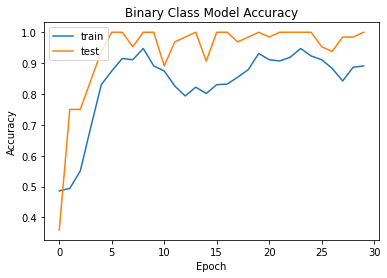

In [ ]:
# Plotting Model Accuracy - Binary
plt.plot(Model_Eval.history['accuracy'])
plt.plot(Model_Eval.history['val_accuracy'])
plt.title('Binary Class Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Binary_class_Acc-30Epochs.png')
plt.show()


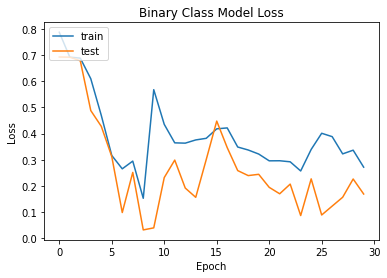

In [ ]:
# Plotting Model Loss - Binary
plt.plot(Model_Eval.history['loss'])
plt.plot(Model_Eval.history['val_loss'])
plt.title('Binary Class Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Binary_class_loss-30Epochs.png')
plt.show()

### CONFUSION MATRIX - BINARY CLASSIFICATION


In [ ]:
#Function to create and plot a Confusion_Matrix

class_label = ["COV-19","NORMAL"] #adjust the bin_classes (Binary vs Multi)

def confusion_matrix_plot(cm, classes, normalize=False, 
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    Use the function to create a confusion matrix and plot the values.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    """
    Set normalization='True' for normalization.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix - (Normalized)")
    else:
        print('Confusion Matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True-label')
    plt.xlabel('Predicted-label')

## EVALUATION & PREDICTIONS 

In [ ]:
# Using the model.predict method for predicting the outcomes/probabilities. 
test_image_gen.reset()
predictions = cnn_model.predict(test_image_gen, num_of_test_samples // batch_size+1)

In [ ]:
# Converting the probabilities to binaries
predictedClass = np.argmax(predictions, axis=1)


In [ ]:
# indicies of the test image generator 
trueClass=test_image_gen.classes[test_image_gen.index_array]


In [ ]:
# Names of the classes.
target_names = list(train_image_gen.class_indices.keys())
target_names

['COV-19', 'NORMAL']

In [ ]:
# Printing Confusion Matrix using sklearn
print('Confusion Matrix')
conf_mat=confusion_matrix(y_true=trueClass, y_pred=predictedClass)
print(conf_mat)

Confusion Matrix
[[41  0]
 [ 0 41]]


In [ ]:
 # Accuracies and Misclassification based on the model
 accuracy = np.trace(conf_mat) / float(np.sum(conf_mat))
 misclass = 1 - accuracy

Confusion Matrix
[[41  0]
 [ 0 41]]


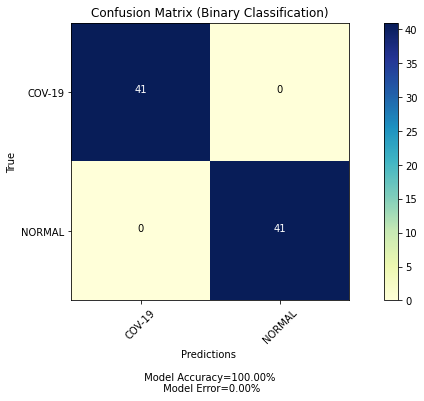

In [ ]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10,5))
confusion_matrix_plot(conf_mat, classes=target_names,
                      title='Confusion Matrix (Binary Classification)',cmap="YlGnBu")
plt.ylabel('True')
plt.xlabel('Predictions \n \n Model Accuracy={:0.2f}% \n Model Error={:0.2f}%'.format(accuracy*100, misclass*100))
plt.savefig('Confusion Matrix Binary Class Classification.png', bbox_inches = "tight")
plt.show()

# CLASSIFICATION REPORT AND ROC CURVE

In [ ]:
# Generating the classification report for the Binary Model
print('***********************Classification Report (Binary) *******************************')
print('')
print(classification_report(trueClass, predictedClass, target_names=target_names))

***********************Classification Report (Binary) *******************************

              precision    recall  f1-score   support

      COV-19       1.00      1.00      1.00        41
      NORMAL       1.00      1.00      1.00        41

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [ ]:
# Generating Model Accuracies, Specificity and Sensitivity
total = sum(sum(conf_mat))
acc = (conf_mat[0, 0] + conf_mat[1, 1]) / total
sensitivity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
specificity = conf_mat[1, 1] / (conf_mat[1, 0] + conf_mat[1, 1])

print("***************************Model Report*************************************")
print("Model Acc: {:.4f}".format(acc))
print('')
print("Sensitivity: {:.4f}".format(sensitivity))
print('')
print("Specificity: {:.4f}".format(specificity))

***************************Model Report*************************************
Model Acc: 1.0000

Sensitivity: 1.0000

Specificity: 1.0000


<Figure size 432x288 with 0 Axes>

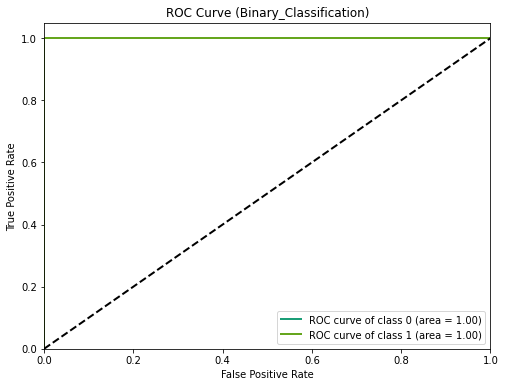

In [ ]:
# Generatring the ROC curve using the Scikitplot's plot_roc method
plt.figure()
skplt.metrics.plot_roc(y_true=trueClass, y_probas=predictions, title='ROC Curve (Binary_Classification)', plot_micro=False, plot_macro=False,
                            classes_to_plot=None, ax=None, figsize=(8, 6), cmap='Dark2', title_fontsize='large', text_fontsize='medium')
plt.savefig('ROC_Binary_Classification.png', bbox_inches = "tight")
plt.show()